Zomato Data Analysis Using Python

In [43]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot                    
import matplotlib.pyplot as plt   


 Zomato Data Analysis Using Python

Zomato is a restaurant search and discovery service founded in 2008 by Indian entrepreneurs Deepinder Goyal and Pankaj Chaddah. It caters to millions of users every month and currently operates in 23 countries. Zomato lets users search restaurants, get recommendations, add reviews, view photos, and more.

---

### Objective:
This is an *Exploratory Data Analysis (EDA)* of the Zomato dataset. We will:
- Understand the structure of the data
- Visualize key insights
- Identify hidden patterns (if any)

The data is at the *restaurant level*.

---

### Final Goal:
We'll try to identify the key factors that help predict the *Aggregate Restaurant Rating*.

Initial view of Dataset

In [44]:
dataset=pd.read_csv("zomato.csv",encoding = "ISO-8859-1")

In [45]:
dataset.head(8)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677


In [46]:
dataset.shape

(9551, 21)

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Now we will define columna and rows value

In [48]:
dataset.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

The data contains the following columns -

Restaurant ID - Unique identification assigned to each restaurant by Zomato. In itself, for this dataset, it does not serve any useful purpose.
Restaurant Name - Name of the Restaurant
Country Code
City*
Address
Locality
Locality Verbose - Locality along with City info*
Latitude*
Longitude*
Cusinies - List of cusines served*
Average Cost of two (INR if consider data from India/Indian Cities)*
Currency
Has Table Booking (boolean)
Has Online Delivery (boolean)
Is Delivering Now (boolean)
Switch to order menu (boolean)
Price range (levels)
Aggregate rating (avg of all votes received)*
Rating Color (Zomato's lingo)
Rating text (V.Good,Good,Avg,Poor)*
Votes
*Points of Interest


In [49]:
# zomatoprofile=ProfileReport(dataset,title='Zomato data: Pandas profiling reports',html={'style':{'full_width':True}})
                                                                                

In [50]:
dataset.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


Data Quality Assessment
1. Missing Values

If we remember from our zomato_data.info(), we have one column, Cuisines with missing values.

There are multiple ways to deal with missing values. A few of the methods that we can use to populate the missing values are as follows:

Fill up the missing values with the most commonly occuring value in the column (mode)
Fill in values based on what would make more sense per the domain of the data in consideration (Verify with Subject Matter Expert)
Remove the rows if the percentage of missing values is negligible to your analysis
More Ways to deal with Missing Values In Machine Learning Datasets can be found here

For this case, we will be populating the missing values with the Mode (the most commonly occuring cuisine)

In [51]:
dataset['Cuisines'].mode()

0    North Indian
Name: Cuisines, dtype: object

In [52]:
dataset[dataset['Cuisines']=="North Indian"]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
680,2400052,Eat On,1,Allahabad,"Palace Compound, Near Palace Cinema, MG Marg, ...",Civil Lines,"Civil Lines, Allahabad",81.834236,25.450377,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,3.7,Yellow,Good,105
686,2200078,Charming Chicken,1,Amritsar,"Shop 3, Opposite Nari Nikaten, Majithia Road, ...",Basant Nagar,"Basant Nagar, Amritsar",74.884384,31.644532,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,3.9,Yellow,Good,151
690,2200067,Bubby Fish & Chicken Corner,1,Amritsar,"Near Crystal Chowk, Cooper Road, INA Colony, A...",INA Colony,"INA Colony, Amritsar",74.875828,31.635671,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,3.5,Yellow,Good,91
699,2200132,Brothers Dhaba,1,Amritsar,"Golden Temple Out Road, Opposite Amritsar Muni...",Town Hall,"Town Hall, Amritsar",74.877666,31.625981,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.8,Yellow,Good,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9148,18378803,#Dilliwaala6,1,Puducherry,"6, Rue De La Marine, White Town, Puducherry",White Town,"White Town, Puducherry",79.834810,11.936532,North Indian,...,Indian Rupees(Rs.),No,No,No,No,3,3.7,Yellow,Good,124
9173,18441490,Barbeque Ville,1,Pune,"257, Green Valley, Near Mankar Chowk, Kaspate ...",Wakad,"Wakad, Pune",73.773572,18.592718,North Indian,...,Indian Rupees(Rs.),Yes,No,No,No,3,4.4,Green,Very Good,208
9227,3200002,Gazebo Garden Restaurant,1,Vadodara,"Opposite FGI, Near Iscon Harmony, Sevasi-Bhimp...",Panchvati,"Panchvati, Vadodara",0.000000,0.000000,North Indian,...,Indian Rupees(Rs.),No,No,No,No,3,3.5,Yellow,Good,82
9241,3900250,Baati Chokha,1,Varanasi,"Anand Mandir Cinema, Telibagh, Dashaswmedh Roa...",Dashaswmedh Road,"Dashaswmedh Road, Varanasi",0.000000,0.000000,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.7,Yellow,Good,68


In [53]:
dataset['Cuisines'].mode()[0]

'North Indian'

In [56]:
dataset['Cuisines'].fillna(dataset['Cuisines'].mode()[0], inplace=True)

In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

2. Incosistent Values

We know that data can contain inconsistent values. Most probably we have already faced this issue at some point. It may be due to human error or maybe the information was misread while being scanned from a handwritten form

Visualization with Zomato Data
One of the easiest ways to understand the data is to simply look at it. Depending on the complexity of the data, we can look at the table or we can try to visualize it. A visualization does not need to be complex or colorful. An effective visualization should convey the underlying information properly.

We will begin with simple and effective visualizations and gradually make out way to more interesting ones.

We have a 2-D Canvas i.e., our computer screen when it comes to visualizing the data. The components that we can use to introduce dimensionality include the following:

X-Axis
Y-Axis
Color
Shape
Viz within viz

1. Zomato's Presence across the Globe

In [ ]:
# Plotting thecoordinates of the restaurants on an interactive map 

dataset= dataset.copy(deep=True)

colorscale = [
[0, 'rgb(255, 255, 255)'], 
[0.1, 'rgb(255, 255, 255)'],
[0.2, 'rgb(212, 28, 28)'], 
[0.3, 'rgb(212, 28, 28)'],
[0.4, 'rgb(255, 186, 59)'], 
[0.5, 'rgb(255, 186, 59)'],
[0.6, 'rgb(248, 255, 59)'], 
[0.7, 'rgb(248, 255, 59)'], 
[0.8, 'rgb(0, 227, 30)'], 
[0.9, 'rgb(0, 227, 30)'],
[1, 'rgb(0, 117, 16)']
]

fig1 = [dict(
    type='scattergeo',
    lon = dataset['Longitude'],
    lat = dataset['Latitude'],
    text = dataset['Restaurant Name'], 
    mode = 'markers',
    marker = dict(
    color = dataset['Rating color'],
    cmin = dataset['Aggregate rating'].min(),
    cmax = dataset['Aggregate rating'].max(),
    colorscale=colorscale,
    colorbar = dict(
                title = 'Rating'
            )
        )
    )]

fig_layout = dict(
    title = 'Rating of zomato restaurants on the world map'
)
fig = go.Figure(data=fig1, layout=fig_layout)
iplot(fig)

Quick Inferences -

Zomato's largest market is in India itself, nobody even comes close.
Analysing data from India should give us a pretty accurate representation of the entire data.
One important thing that might vary across different regions is the types of Cusinies. So it should be interesting to see how many cusinies are served throughout the world.

2. What are the most common cuisines?

In [30]:
dataset.groupby(['Cuisines'],as_index=False)['Restaurant ID'].count()

,Cuisines,Restaurant ID
0,Afghani,4
1,"Afghani, Mughlai, Chinese",1
2,"Afghani, North Indian",1
3,"Afghani, North Indian, Pakistani, Arabian",1
4,African,1
...,...,...
1820,"Western, Asian, Cafe",1
1821,"Western, Fusion, Fast Food",1
1822,World Cuisine,1
1823,"World Cuisine, Mexican, Italian",1


In [32]:
cuisine_data = dataset.groupby(['Cuisines'], as_index=False)['Restaurant ID'].count()
cuisine_data.columns = ['Cuisines','Number of Resturants']
Top15= (cuisine_data.sort_values(['Number of Resturants'],ascending=False)).head(15)
Top15

,Cuisines,Number of Resturants
1306,North Indian,945
1329,"North Indian, Chinese",511
497,Chinese,354
828,Fast Food,354
1514,"North Indian, Mughlai",334
331,Cafe,299
177,Bakery,218
1520,"North Indian, Mughlai, Chinese",197
186,"Bakery, Desserts",170
1749,Street Food,149


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\user\AppData\Local\Temp\ipykernel_10748\1930047595.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




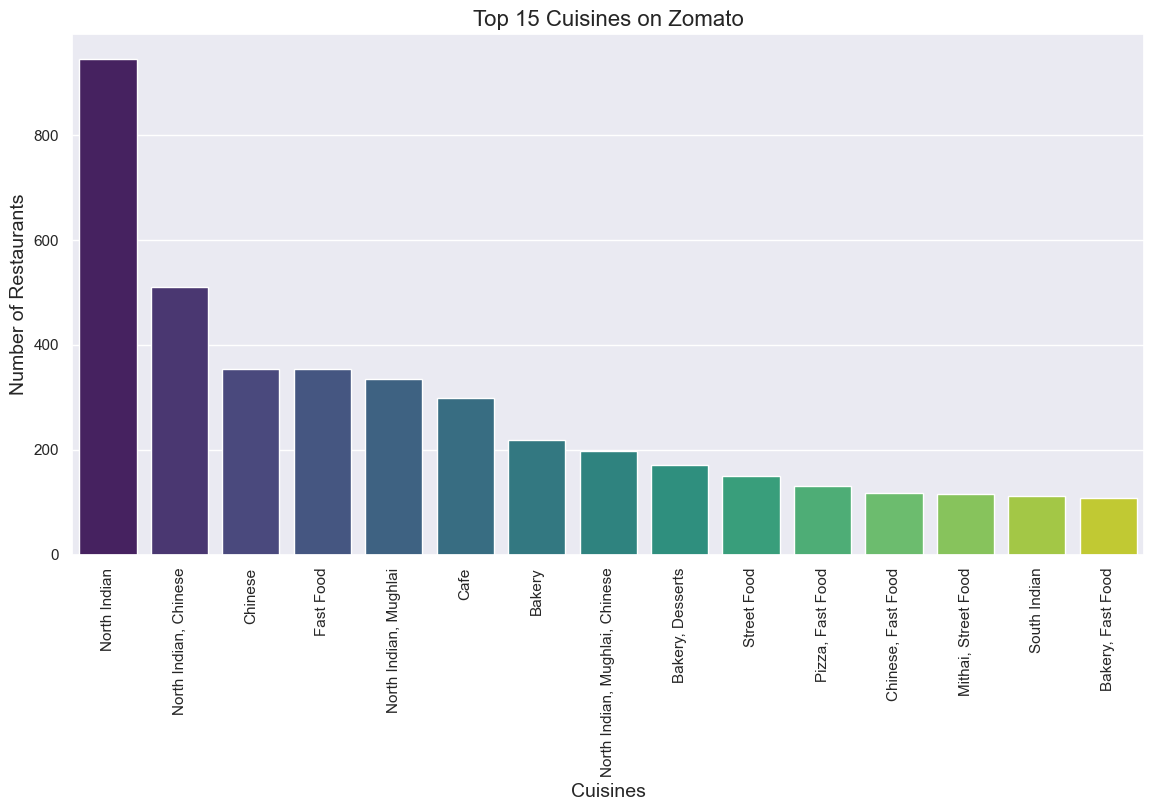

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset as 'dataset'
cuisine_data = dataset.groupby('Cuisines', as_index=False)['Restaurant ID'].count()
cuisine_data.columns = ['Cuisines', 'Number of Restaurants']

# Get top 15 cuisines
Top15 = cuisine_data.sort_values(by='Number of Restaurants', ascending=False).head(15)

# Plotting
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.barplot(data=Top15, x='Cuisines', y='Number of Restaurants', palette='viridis')
plt.xlabel('Cuisines', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)
plt.title('Top 15 Cuisines on Zomato', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


3. What are the top 15 restaurants with Maximum Outlets?

<Axes: title={'center': 'Top 15 Restaurants with maximum outlets'}, ylabel='count'>

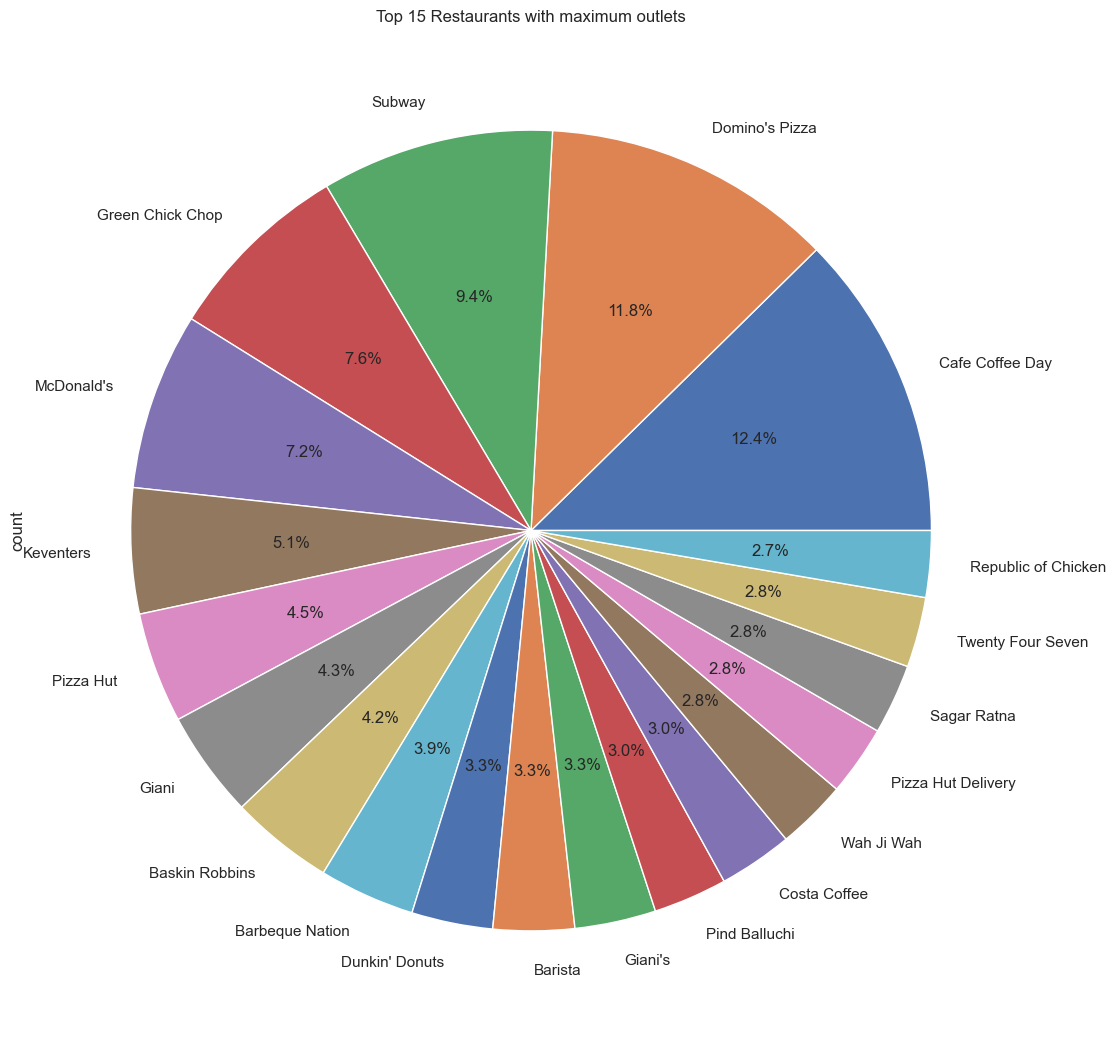

In [41]:
# Plotting pie chart with title and float with 1 decimal points
dataset['Restaurant Name'].value_counts().head(20).plot(kind='pie',figsize=(13,13), title="Top 15 Restaurants with maximum outlets", autopct='%1.1f%%')

Thank you so much.